In [43]:
import lucem_illud as li
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import wordcloud

import incels

In [2]:
main_df = incels.csv_loader('data/main_resp.csv')
main_df.drop_duplicates(['thread_title', 'comment_id'], inplace=True)

In [3]:
main_df.head()

,post_id,comment_id,thread_title,thread_tag,thread_author,thread_time,username,user_label,post_time,raw_text,tokens,normal_tokens,normal_tokens_POS
id,,,,,,,,,,,,,
main_1_0,1,0,Useful Links,NaN,SergeantIncel,2018-10-01 17:24:20,SergeantIncel,Admincel,2018-10-01 17:24:20,List of useful links:\n\nRules & FAQ\nIntroduc...,"[List, of, useful, links, Rules, FAQ, Introduc...","[list, useful, links, rules, faq, introduction...","[(list, NN), (useful, JJ), (links, NNS), (rule..."
main_2_0,2,0,My arms are so small,[SuicideFuel],MaxZM98,2018-10-17 13:38:33,MaxZM98,Socially constructed loser,2018-10-17 13:38:33,I was looking at myself in the gym mirror and ...,"[I, was, looking, at, myself, in, the, gym, mi...","[looking, gym, mirror, arms, look, like, nt, l...","[(looking, VBG), (gym, NN), (mirror, NN), (arm..."
main_2_1,2,1,My arms are so small,[SuicideFuel],MaxZM98,2018-10-17 13:38:33,itsmemario,Banned,2018-10-17 13:43:07,"You, have a shitty training plan or shitty mea...","[You, have, a, shitty, training, plan, or, shi...","[shitty, training, plan, shitty, meal, plan, h...","[(shitty, JJ), (training, NN), (plan, NN), (sh..."
main_2_2,2,2,My arms are so small,[SuicideFuel],MaxZM98,2018-10-17 13:38:33,3uxp,Captain,2018-10-17 13:43:51,"I bet you're white, huge muscles and big arms ...","[I, bet, you, 're, white, huge, muscles, and, ...","[bet, white, huge, muscles, big, arms, reserve...","[(bet, VB), (white, JJ), (huge, JJ), (muscles,..."
main_2_3,2,3,My arms are so small,[SuicideFuel],MaxZM98,2018-10-17 13:38:33,Hunter,Banned,2018-10-17 13:46:34,"@MaxZM98 \n\nNoFap, now!","[@MaxZM98, NoFap, now]","[@maxzm98, nofap]","[(@maxzm98, NNP), (nofap, NNP)]"


In [4]:
mainText = nltk.Text(main_df.tokens.sum())

In [8]:
count_df = pd.DataFrame(columns=['slang', 'count'])
for term in incels.get_slang(3):
    count_df = count_df.append({'slang': term, 'count': mainText.count(term)}, ignore_index=True)

In [9]:
count_df[count_df['count'] > 1].sort_values(by='count', ascending=False).head(20)

,slang,count
67,incel,1067
49,foid,944
35,chad,538
41,cuck,409
39,cope,320
139,normie,254
2,blackpill,234
87,inceldom,206
120,manlet,166
162,rope,160


I created a dispersion plot for the top 75 slang terms

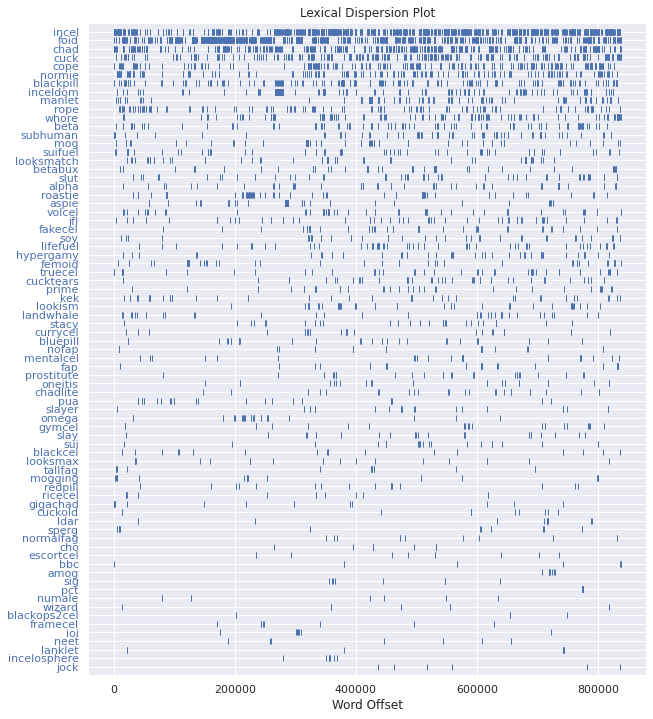

In [18]:
top_slang = count_df[count_df['count'] > 1].sort_values(by='count', ascending=False).head(75).values
top_slang = [x[0] for x in top_slang]
fig, ax = plt.subplots(figsize=(10, 12))
sns.reset_orig()
mainText.dispersion_plot(top_slang)
sns.set()
plt.show()

In [38]:
mainText.common_contexts(['chad', 'stacy'], 100)

a_i a_because and_wo and_just and_'s a_with and_can expand_and the_'s
get_if old_click a_'s


In [39]:
mainIndex = nltk.text.ConcordanceIndex(mainText)

In [44]:
wc = wordcloud.WordCloud(background_color='white', max_words=500, width=1000, height=1000, mode='RGBA', scale=0.5).generate(' '.join(main_df['normal_tokens'].sum()))

Below, I created a word cloud to create a visualization of the use of terms, highlighting specifically the use of "foid", a derogatory slang term used to refer to women

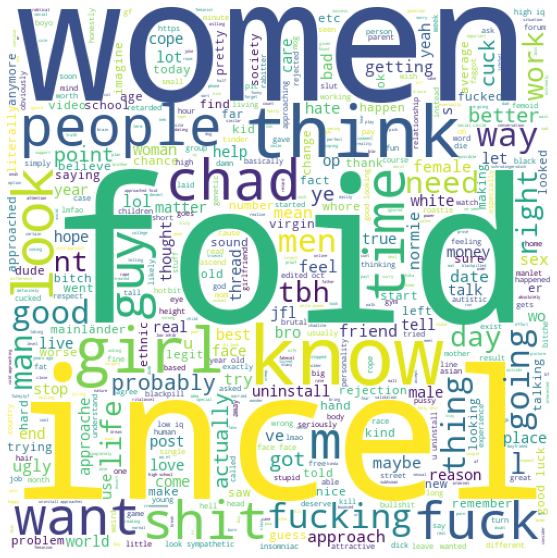

In [45]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(wc)
ax.axis('off')
plt.show()

Here, I explored the use of the POS tags as it relates to slang, but as expected, spaCy struggles to identify correctly the part of speech of the slang terms

In [46]:
mainFDist_POS = nltk.ConditionalFreqDist((p, w) for w, p in main_df['normal_tokens_POS'].sum())

In [53]:
print(mainFDist_POS['VB'].most_common(100))

[('expand', 7379), ('click', 4351), ('look', 717), ('think', 488), ('stop', 325), ('let', 291), ('try', 289), ('know', 280), ('tell', 276), ('want', 264), ('feel', 256), ('cope', 235), ('find', 184), ('happen', 176), ('remember', 145), ('come', 140), ('ask', 128), ('foid', 124), ('guess', 112), ('mean', 109), ('die', 104), ('understand', 101), ('help', 98), ('start', 97), ('stay', 92), ('need', 90), ('wait', 87), ('forget', 86), ('kill', 81), ('eat', 81), ('fuck', 78), ('grow', 76), ('believe', 75), ('lose', 72), ('leave', 71), ('pay', 69), ('imagine', 66), ('send', 65), ('buy', 65), ('ascend', 63), ('kiss', 62), ('hear', 61), ('ignore', 61), ('face', 57), ('lifefuel', 57), ('use', 56), ('meet', 56), ('avoid', 55), ('learn', 54), ('shit', 54), ('deserve', 52), ('improve', 51), ('prove', 48), ('save', 47), ('sit', 46), ('dude', 46), ('bring', 45), ('post', 44), ('speak', 42), ('spend', 42), ('live', 42), ('m', 42), ('reach', 42), ('agree', 41), ('count', 41), ('play', 40), ('accept', 40

In [54]:
incelBigrams = nltk.collocations.BigramCollocationFinder.from_words(main_df['normal_tokens'].sum())

Not much relating to slang was revealed with bigrams

In [62]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
incelBigrams.score_ngrams(bigram_measures.mi_like)[:40]

[(('=', '='), 2033.3120280435396),
 (('edited', 'oct'), 47.53961456102784),
 (('san', 'salvador'), 47.43859649122807),
 (('jerrycan', 'dan'), 33.8),
 (('chudur', 'budur'), 31.861211129296237),
 (('going', 'to'), 31.469411805483347),
 (('u', '@uninstall'), 31.442641687579197),
 (('look', 'sympathetic'), 26.993030639654737),
 (('clock', 'tower'), 26.28125),
 (('rice', 'cel'), 25.585081585081586),
 (('low', 'iq'), 25.418860249982345),
 (('emergency', 'manual'), 24.360795454545453),
 (('good', 'luck'), 24.3363005700941),
 (('year', 'old'), 23.128230669585026),
 (('wall', 'hitter'), 22.16393442622951),
 (('kb', 'views'), 21.25287356321839),
 (('harry', 'potter'), 20.346153846153847),
 (('de', 'montherlant'), 19.32075471698113),
 (('henry', 'de'), 19.32075471698113),
 (('plastic', 'surgery'), 19.020781965480804),
 (('richard', 'spencer'), 18.0),
 (('base', 'pairs'), 14.235294117647058),
 (('spec', 'carrot'), 13.0),
 (('high', 'iq'), 12.342515481528935),
 (('social', 'circle'), 12.30985360882

In [65]:
trigram_measures = nltk.collocations.TrigramAssocMeasures()
incelTrigrams = nltk.collocations.TrigramCollocationFinder.from_words(main_df['normal_tokens'].sum())

Similar results with trigrams

In [66]:
incelTrigrams.score_ngrams(trigram_measures.student_t)[:20]

[(('=', '=', '='), 48.965824391136216),
 (('>', 'face', '>'), 13.855936499770003),
 (('face', '>', 'face'), 13.855791505867574),
 (('hi', 'look', 'sympathetic'), 8.77479279117496),
 (('>', '>', '>'), 8.2456077526195),
 (('good', 'luck', 'fight'), 8.123928545721746),
 (('luck', 'fight', 'autism'), 7.873994309931499),
 (('=', '=', 'girl'), 6.548338918364865),
 (('henry', 'de', 'montherlant'), 5.656854166889238),
 (('m', 'going', 'to'), 5.383586886026471),
 (('m', 'pretty', 'sure'), 5.290673021458919),
 (('way', 'hell', 'girl'), 5.195681580258053),
 (('hell', 'girl', 'like'), 5.194435575440547),
 (('uninstall', 'way', 'hell'), 5.098501686852356),
 (('far', 'approached', 'fellas'), 4.898964953564181),
 (('high', 'tier', 'normie'), 4.898915042524864),
 (('good', 'luck', 'life'), 4.89785774558051),
 (('like', 'far', 'approached'), 4.897216839184861),
 (('girl', 'like', 'far'), 4.896772633394351),
 (('fight', 'autism', 'left'), 4.795809705064189)]